## **The Role of Methane Emissions from the Energy Sector in Global Warming and Air Quality**

Methane is responsible for around 30% of the rise in global temperatures since the Industrial Revolution, and rapid and sustained reductions in methane emissions are key to limiting near-term global warming and improving air quality. The energy sector – including oil, natural gas, coal and bioenergy – accounts for nearly 40% of methane emissions from human activity.

[Dataset](https://www.kaggle.com/datasets/ashishraut64/global-methane-emissions)

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/global-methane-emissions/Methane_final.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'region', 'country', 'emissions', 'type', 'segment',
       'reason', 'baseYear', 'notes'],
      dtype='object')

In [4]:
df['type'].value_counts()

Energy         1233
Agriculture     105
Other           105
Waste           105
Name: type, dtype: int64

In [5]:
df.head()

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


In [6]:
df.tail()

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
1543,1543,World,World,3102.500000,Energy,Satellite-detected large oil and gas emissions,All,2022,Not available
1544,1544,World,World,30296.500000,Energy,Steam coal,All,2022,Not available
1545,1545,World,World,133350.984375,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1546,1546,World,World,9737.874023,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...
1547,1547,World,World,70758.710938,Waste,Total,All,2019-2021,Average based on United Nations Framework Conv...


From the output, we can see that there is an additional column named 'Unnamed: 0', which appears to be an index column. We can drop this column using df.drop('Unnamed: 0', axis=1, inplace=True).

Now, let's check for the missing values in the dataset using df.isnull().sum() function.

In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df['segment'].value_counts()

Total                                             414
Onshore oil                                       217
Gas pipelines and LNG facilities                  164
Offshore oil                                      159
Onshore gas                                       144
Offshore gas                                      118
Other from oil and gas                             98
Bioenergy                                          93
Other from coal                                    66
Steam coal                                         30
Coking coal                                        24
Satellite-detected large oil and gas emissions     21
Name: segment, dtype: int64

In [9]:
print(df.isnull().sum())

region       0
country      0
emissions    0
type         0
segment      0
reason       0
baseYear     0
notes        0
dtype: int64


## **Visualization**

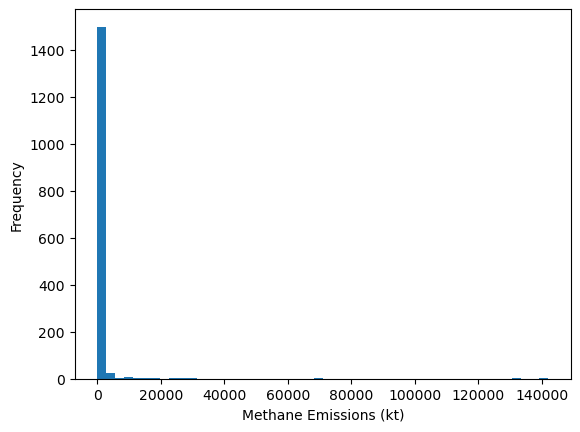

In [10]:
import matplotlib.pyplot as plt
df['emissions'].plot.hist(bins=50)
plt.xlabel('Methane Emissions (kt)')
plt.ylabel('Frequency')
plt.show()

In [11]:
top_countries = df.groupby('country')['emissions'].sum().sort_values(ascending=False).head(10)
print(top_countries)

country
World             489152.316956
China              81048.371586
United States      48604.877296
Russia             42432.929804
India              34852.007386
Brazil             21720.838126
Indonesia          19404.469000
European Union     18985.173461
Other              15997.357175
Iran               13030.685366
Name: emissions, dtype: float64


Regardless, we can still perform some EDA on this dataset. We can start by excluding the 'World' and 'Other' categories and looking at the top 10 countries with the highest methane emissions.

In [12]:
top_countries = df[df['country']!='World'].groupby('country')['emissions'].sum().sort_values(ascending=False).head(10)
print(top_countries)

country
China             81048.371586
United States     48604.877296
Russia            42432.929804
India             34852.007386
Brazil            21720.838126
Indonesia         19404.469000
European Union    18985.173461
Other             15997.357175
Iran              13030.685366
Nigeria            9903.895667
Name: emissions, dtype: float64


In [13]:
top_countries = df[df['country']!='World'].groupby('country')['emissions'].sum().sort_values(ascending=False).head(10)
print(top_countries)

country
China             81048.371586
United States     48604.877296
Russia            42432.929804
India             34852.007386
Brazil            21720.838126
Indonesia         19404.469000
European Union    18985.173461
Other             15997.357175
Iran              13030.685366
Nigeria            9903.895667
Name: emissions, dtype: float64


We can see that the top 4 countries with the highest methane emissions are still **China, United States, Russia, and India**, followed by several other countries with lower emissions.

We can also visualize the distribution of methane emissions by sector using a bar plot. This will show the total emissions by sector.

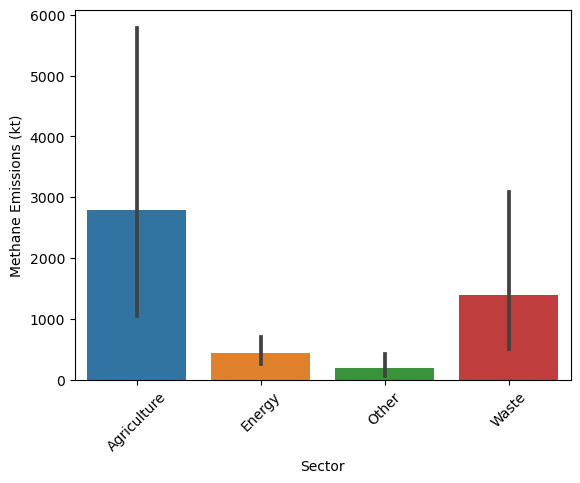

In [14]:
import seaborn as sns
sns.barplot(x='type', y='emissions', data=df)
plt.xticks(rotation=45)
plt.xlabel('Sector')
plt.ylabel('Methane Emissions (kt)')
plt.show()

We can also visualize the distribution of methane emissions by region using a box plot. This will show the median, quartiles, and outliers in the distribution of emissions by region.

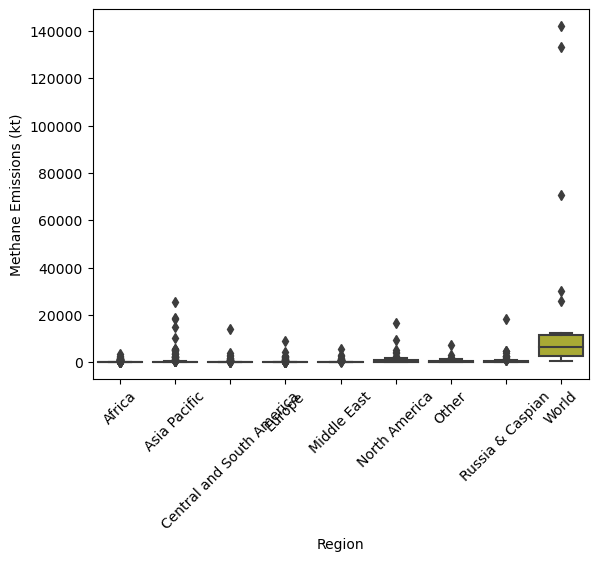

In [15]:
sns.boxplot(x='region', y='emissions', data=df)
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Methane Emissions (kt)')
plt.show()

The output will be a box plot showing the distribution of methane emissions by region.

From the box plot, we can see that the median methane emissions are highest in the Asia Pacific, followed by America and Europe. Africa and Oceania have relatively lower median emissions. We can also see that there are several outliers in the distribution, particularly in the Americas and Asia regions, suggesting that there are a few countries or sectors with very high methane emissions in these regions.

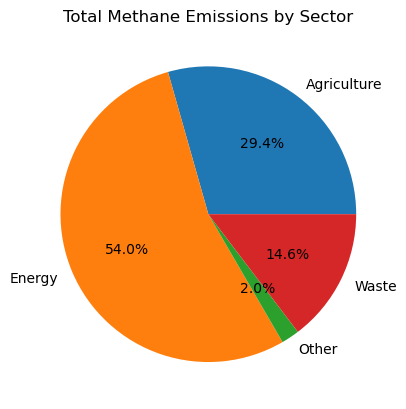

In [16]:
df.groupby('type')['emissions'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Total Methane Emissions by Sector')
plt.show()

The output will be a pie chart showing the total methane emissions by sector.

**From the pie chart, we can see that the energy sector, which includes oil, natural gas, coal, and bioenergy, is responsible for above 50% of methane emissions from human activity, followed by agriculture and waste sectors. This highlights the importance of reducing methane emissions from the energy sector in order to limit near-term global warming and improve air quality.**

### **Visualize the top 10 countries with the highest methane emissions using a bar plot.**

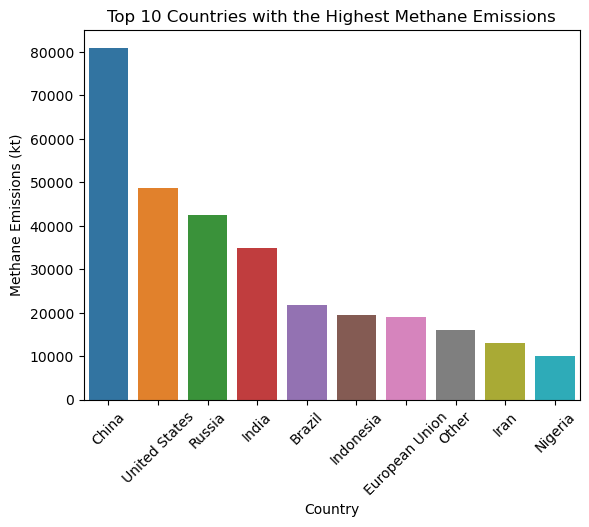

In [17]:


top_countries = df[df['country']!='World'].groupby('country')['emissions'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Methane Emissions (kt)')
plt.title('Top 10 Countries with the Highest Methane Emissions')
plt.show()

The output will be a bar plot showing the total methane emissions for each of the top 10 countries.

**Plot the trend of methane emissions over time for a specific country or region.**

### **Visualize the distribution of methane emissions by sector and reason using a stacked bar plot.**

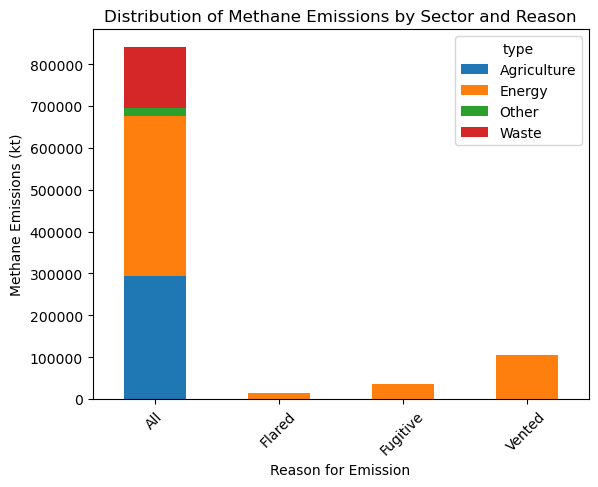

In [18]:
# Filter out the rows with missing values in the 'reason' column
df_clean = df.dropna(subset=['reason'])

# Pivot the dataset to have the sectors as columns, the reasons as rows, and the emissions as values
df_pivot = df_clean.pivot_table(index='reason', columns='type', values='emissions', aggfunc=np.sum)

# Plot the stacked bar plot
df_pivot.plot(kind='bar', stacked=True)
plt.xticks(rotation=45)
plt.xlabel('Reason for Emission')
plt.ylabel('Methane Emissions (kt)')
plt.title('Distribution of Methane Emissions by Sector and Reason')
plt.show()

In [19]:
temp=df[df['type']=='Energy']
temp.head()

,region,country,emissions,type,segment,reason,baseYear,notes
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available
5,Africa,Algeria,464.308014,Energy,Onshore gas,Vented,2022,Not available


# Region wise segment analysis

In [20]:
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

px.sunburst(temp,values='emissions',path=['region','segment'],color='region',width=700,height=700)


In [21]:
temp1=temp.groupby('segment').sum().reset_index()
temp1.sort_values('emissions',ascending=False,inplace=True)

In [22]:
# Segment vs Emissions
px.bar(temp1,x='segment',y='emissions',color='segment',labels={'emissions':'Methane emission'})

In [23]:
temp2=df[df['country']!='World']
temp2

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available
...,...,...,...,...,...,...,...,...
1521,Russia & Caspian,Uzbekistan,16.973917,Energy,Other from oil and gas,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1522,Russia & Caspian,Uzbekistan,18.299999,Energy,Satellite-detected large oil and gas emissions,All,2022,Not available
1523,Russia & Caspian,Uzbekistan,780.916138,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1524,Russia & Caspian,Uzbekistan,3.845616,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...


In [24]:
temp2=df.loc[np.where((temp2['segment']=='Total'))]
temp2.groupby('type').sum().reset_index()

,type,emissions
0,Agriculture,150805.103144
1,Energy,135347.173195
2,Other,10028.772862
3,Waste,75079.707008


# Emission vs Type analysis

In [25]:
px.pie(temp2,values='emissions',names='type',hole=0.5)

In [26]:
temp3=df[df['country']!='World']
temp3

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available
...,...,...,...,...,...,...,...,...
1521,Russia & Caspian,Uzbekistan,16.973917,Energy,Other from oil and gas,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1522,Russia & Caspian,Uzbekistan,18.299999,Energy,Satellite-detected large oil and gas emissions,All,2022,Not available
1523,Russia & Caspian,Uzbekistan,780.916138,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1524,Russia & Caspian,Uzbekistan,3.845616,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...


In [27]:
temp3=temp3[~((temp3['type']=='Energy')&(temp3['segment']=='Total'))]
temp3.head()

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


In [28]:
temp3=temp3.groupby(['segment','reason']).sum().reset_index()
temp3.drop(index=[18],inplace=True)

# segment and Reason vs Emissions

In [29]:

px.bar(temp3,x='emissions',y='segment',color='reason')

Data Modelling

In [30]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# Load the dataset
df = pd.read_csv('/kaggle/input/global-methane-emissions/Methane_final.csv')

In [32]:
# Define the feature and target variables
X = df[['region', 'type', 'segment', 'reason', 'baseYear']]
y = df['emissions']

In [33]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['region', 'type', 'segment', 'reason', 'baseYear'])

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [37]:
# Evaluate the performance of the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean squared error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean squared error: 54384878.03
R-squared: 0.21


**The results you obtained show that the model has a high mean squared error, indicating that it is not performing very well at predicting methane emissions. Additionally, the R-squared value is low, which means that only 21% of the variance in the target variable is explained by the model.**

To improve the performance of the model, you could try the following:

- **Feature engineering**: create new features that may be more informative or relevant for predicting methane emissions. For example, you could calculate the population density or economic activity in each country, or include data on land use, livestock population, or energy consumption.

- **Feature selection:** eliminate irrelevant or redundant features that may be introducing noise or reducing the model's ability to generalize to new data. You could use techniques such as correlation analysis, principal component analysis (PCA), or regularization to identify and remove unnecessary features.

- **Model selection:** try different models and compare their performance using appropriate metrics. You could use more advanced regression models such as decision trees, random forests, or gradient boosting, or consider non-linear models such as neural networks.

- **Hyperparameter tuning:** optimize the parameters of the chosen model(s) to improve their performance on the validation or test set. You could use techniques such as grid search or random search to explore the parameter space and find the best combination of hyperparameters.

- **Cross-validation:** use cross-validation to evaluate the performance of the model on multiple folds of the data, and assess its ability to generalize to new data.